# Beefed-up clf version2 RF 


interestingly it picked amna for the top 2 photos and some of the other choices are bit more sensible but still can't be too sure on RF probabilities, deosn't provide the precision needed


In [1]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from tsne import image_scatter_plot
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_context("poster")
%pylab inline

import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data, paths, encodings, arrays_rescaled, X = load_encodings('../data/friends_and_myself_pics_faces_encodings.pickle')


In [3]:
lr = pickle.load(open('rf_tinderlikes3.pickle','rb'))
lr

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

count    35.000000
mean      0.418686
std       0.108891
min       0.250000
25%       0.325000
50%       0.430000
75%       0.514000
max       0.656000
dtype: float64
skew --  0.2767429020538368
kurtosis -- -0.8880834979557357


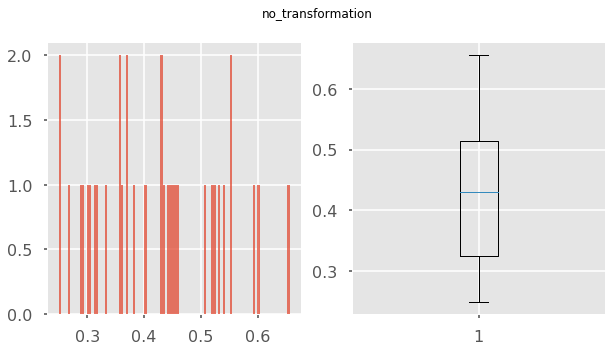

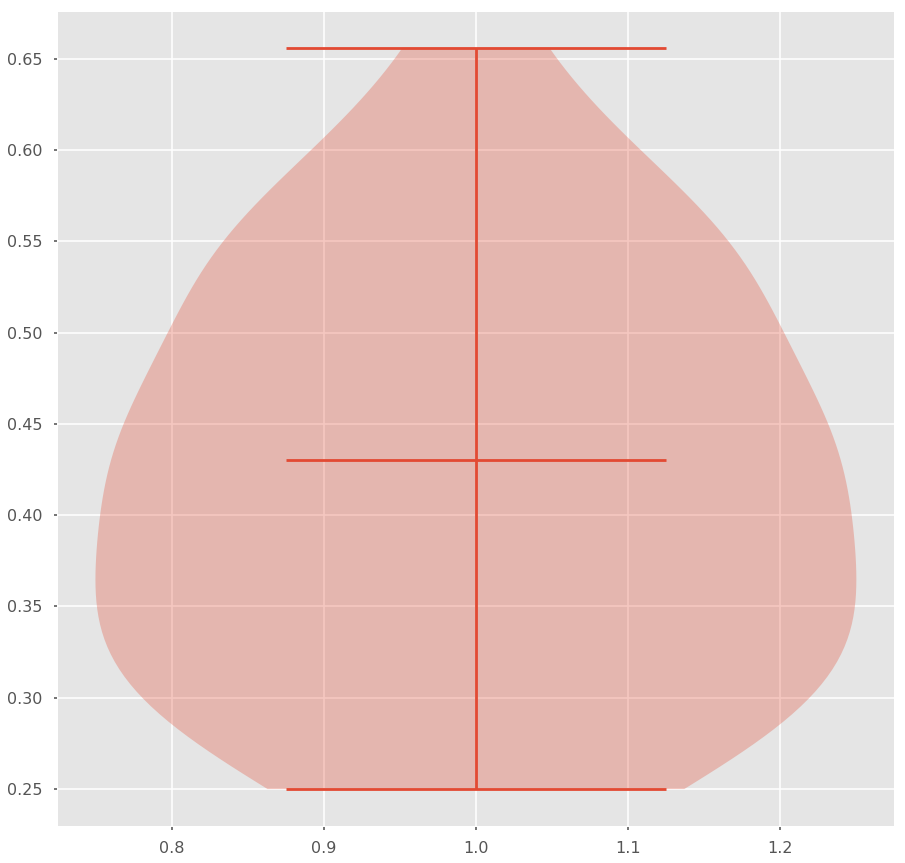

In [4]:

probas = pd.Series(lr.predict_proba(encodings)[:,1])
plot_distribution(probas)

In [5]:
num_of_bins = 5
sorted_imgs = sorted(zip(probas, arrays_rescaled), key=lambda x: x[0], reverse=True)
sorted_arrays_rescaled  = [img[1] for img in sorted_imgs]
sorted_probas = [img[0] for img in sorted_imgs]

bin_bounds = list(map(lambda x: x/100, list(range(0,100, int(100/num_of_bins)))))
bin_labels = pd.cut(sorted_probas, bins=bin_bounds, labels=list(range(1, num_of_bins )))


1
0


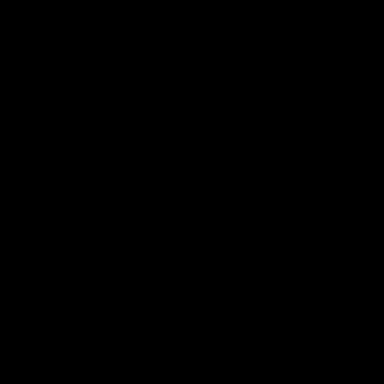

2
16


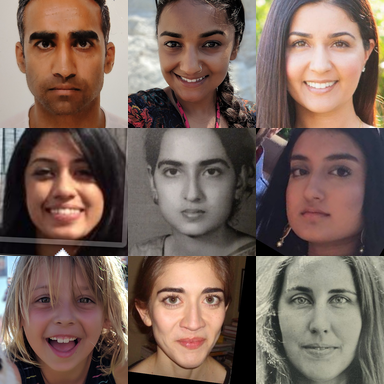

3
18


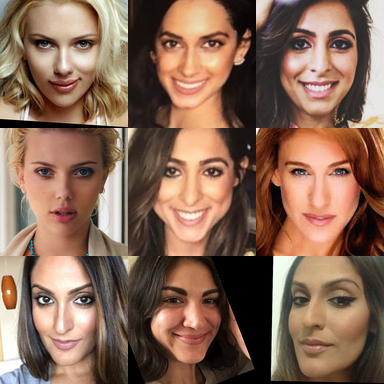

4
1


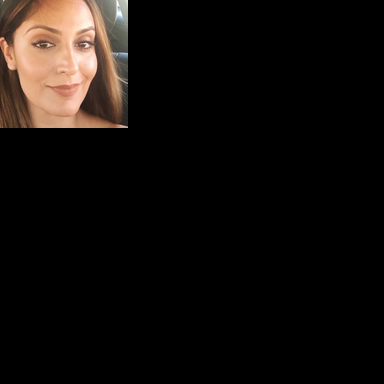

In [6]:
from image_helpers import _square_sizer

for cluster_idx in range(1, num_of_bins):
    print(cluster_idx)
    args = np.where(bin_labels== cluster_idx)[0]
    print(len(args))
    display(
        montagify([np.array(sorted_arrays_rescaled[arg]) for arg in args],
        (128,128), 
        tiles=(3,3)
    ))
    


1
0


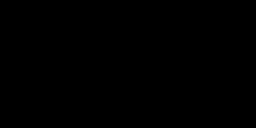

2
16


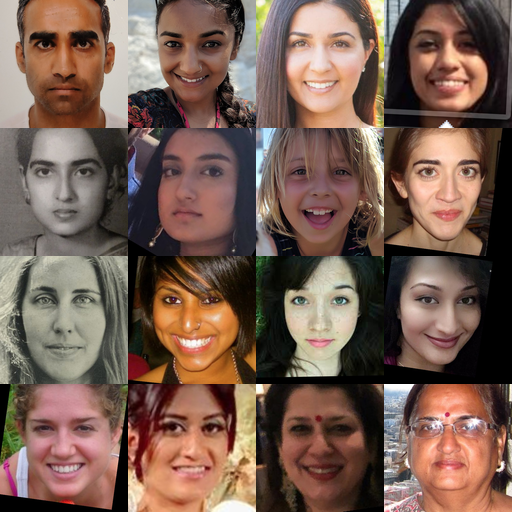

3
18


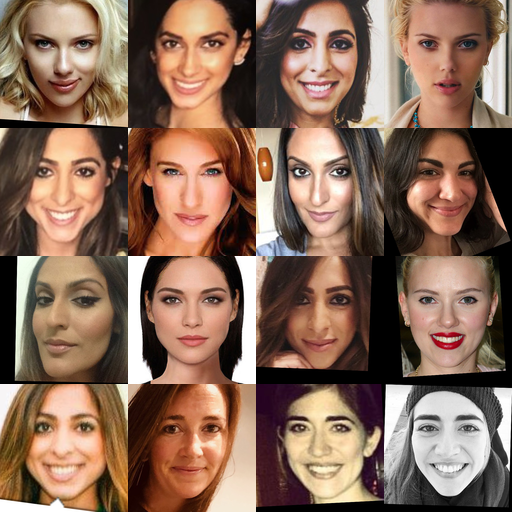

4
1


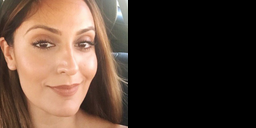

In [7]:

for cluster_idx in range(1, num_of_bins):
    print(cluster_idx)
    args = np.where(bin_labels== cluster_idx)[0]
    print(len(args))
    display(
        montagify([np.array(sorted_arrays_rescaled[arg]) for arg in args],
        (128,128), 
        tiles=_square_sizer(len(args))
    ))
    


# Individual rankings
scarlett johansen photo which scored very highly (but the rest of her photos tanked) One of amna also scored very highly but the other one was mundane.


The b/w photos seemed to have ranked much lower... try including only colored photos of people


0.656


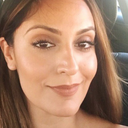

0.6


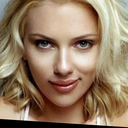

0.592


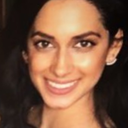

0.554


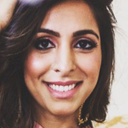

0.552


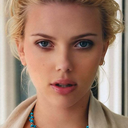

0.542


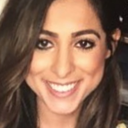

0.532


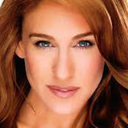

0.524


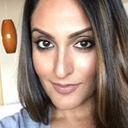

0.52


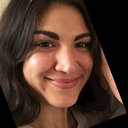

0.508


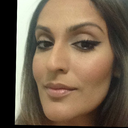

0.46


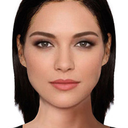

0.456


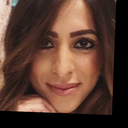

0.45


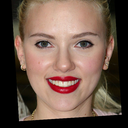

0.446


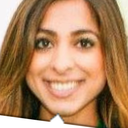

0.444


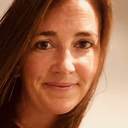

0.436


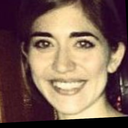

0.432


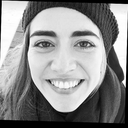

0.43


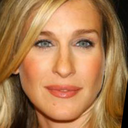

0.404


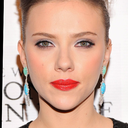

0.38


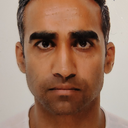

0.37


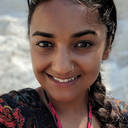

0.37


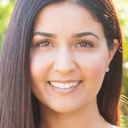

0.362


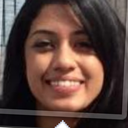

0.356


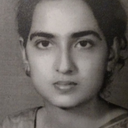

0.356


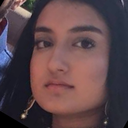

0.334


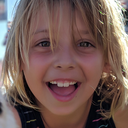

0.316


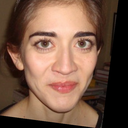

0.314


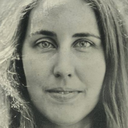

0.304


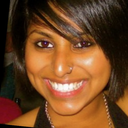

0.302


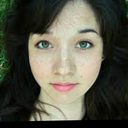

0.292


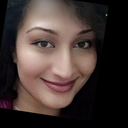

0.288


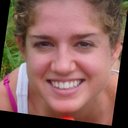

0.268


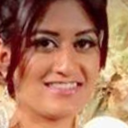

0.254


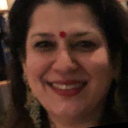

0.25


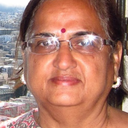

In [8]:
for idx in range(len(sorted_arrays_rescaled)):
    print(sorted_probas[idx])
    display(sorted_arrays_rescaled[idx])
    